<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="in_class.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Inclass - Lab <br>(Week- 1)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

### About the data set 1 (Life Expectancy data)

The dataset contains information about several health and economic factors that contribute to average life expectancy for different countries. <br> Attribute information: 

**Country:** Name of the country

**Status:** Whether the country is Developed or Developing

**Adult_Mortality:** Mortality rate for age group 15-60 out of every 1000 individuals of the population

**Infant_Deaths:** Number of infant deaths per 1000 population

**Hepatitis:** Hepatitis B (HepB) immunization coverage for 1 year olds (Percentage)

**Measles:** Number of reported cases for measles per 1000 from population

**BMI:** Average Body Mass Index for entire population

**Underfive_Deaths:** Number of deaths under 5 years of age per 1000 population

**Polio:** Polio (Pol3) immunization coverage for 1 year olds (Percentage)

**Diphtheria:** Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage for 1 year olds (Percentage)

**HIV:** Deaths per 1000 live births due to HIV/AIDS (0-4 years)

**GDP:** Gross Domestic Product per capita (in USD)

**Population:** Population of the country

**Malnourished10_19:** Prevalence of malnutrition among children and adolescents for Age 10 to 19 (Percentage)

**Malnourished5_9:** Prevalence of malnutrition among children for Age 5 to 9 (Percentage)

**Income_Index:** Human Development Index (HDI) in terms of national income per capita (index ranging from 0 to 1)

**Schooling:** Number of years of Schooling

**Life_Expectancy:** Life Expectancy in age for the country





## Table of Content

1. **[Bivariate Regression](#Bivariate)**
2. **[Multiple Linear Regression (MLR)](#MLR)**
3. **[Inferences about slope](#ins)**
4. **[Model Evaluation](#ML_eval)**
5. **[Assumptions of Linear Regression](#assum)**
6. **[Model Performance](#ml_perf)**

**Import the required libraries**

In [ ]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import 'matplotlib.pyplot' 
import matplotlib.pyplot as plt

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to suppress the notation 'e'    
pd.options.display.float_format = '{:.6f}'.format

# import various metrics from 'Scikit-learn' (sklearn)
from sklearn.model_selection import train_test_split

# 'Statsmodels' is used to build and analyze various statistical models
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
from statsmodels.tools.eval_measures import rmse
from statsmodels.compat import lzip
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import linear_rainbow
import statsmodels.tsa.api as smt
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.stattools import durbin_watson

# 'SciPy' is used to perform scientific computations
from scipy import stats
from scipy.stats import shapiro

# 'metrics' from sklearn is used for evaluating the model performance
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

#### Load the first dataset and check the first five observations

Load the csv file and set the first column as index

In [ ]:
# load the csv file
df_lifeExp = pd.read_csv('Life_Expectancy.csv', index_col=0)

# display the first two observations
df_lifeExp.head(2)

,Status,Adult_Mortality,Infant_Deaths,Hepatitis,Measles,BMI,Underfive_Deaths,Polio,Diphtheria,HIV,GDP,Population,Malnourished10_19,Malnourished5_9,Income_Index,Schooling,Expected
Country,,,,,,,,,,,,,,,,,
Afghanistan,Developing,263,62,65,1154,19.100000,83,6,65,0.100000,584.259210,33736494,17.200000,17.300000,0.479000,10.100000,65.000000
Albania,Developing,8,0,98,0,57.200000,1,98,98,0.100000,4575.763787,288914,1.200000,1.300000,0.761000,14.200000,77.500000


In [ ]:
# check data types of variables
df_lifeExp.dtypes

Status                 object
Adult_Mortality         int64
Infant_Deaths           int64
Hepatitis               int64
Measles                 int64
 BMI                  float64
Underfive_Deaths        int64
Polio                   int64
Diphtheria              int64
 HIV                  float64
GDP                   float64
Population              int64
Malnourished10_19     float64
Malnourished5_9       float64
Income_Index          float64
Schooling             float64
Expected              float64
dtype: object

### Let's begin with some hands-on practice exercises

<a id="Bivariate"> </a>
## 1. Bivariate Regression

## We shall use the life expectancy dataset

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. How do we analyze the impact of adult mortality rate on average life expectancy of a country?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

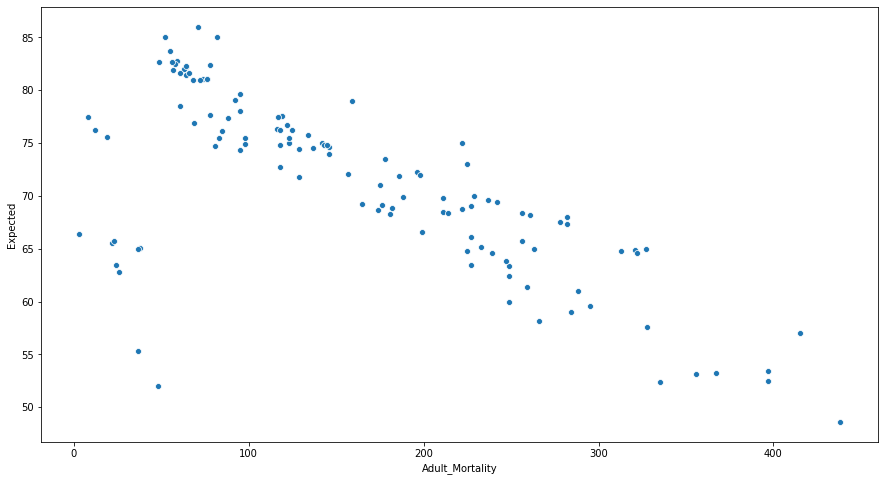

In [ ]:
# set dimensions for the plot figure
fig_dims = (15,8)
fig, ax = plt.subplots(figsize=fig_dims)

# plot a scatter plot to check the relationship
sns.scatterplot(df_lifeExp['Adult_Mortality'],df_lifeExp.Expected)

# display the plot
plt.show()

As we can see from the figure above, the adult mortality rate and average life expectancy of a country have a negative linear relationship between them. Hence bivariate regression can be used to capture and analyze the impact adult mortality has on life expectancy.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. A regression model is built to check the impact of Human Development Index (Income) on the life expectancy of a nation. What is the expected error value?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
# selecting independent variables that describe immunization
X = df_lifeExp['Income_Index']

# 'sm.add_constant' adds the intercept to the model
X = sm.add_constant(X)

# set the dependent variable
y = df_lifeExp.Expected

# building a model with an intercept
# fit() is used to fit the OLS model
SLR_model = sm.OLS(y,X).fit()

# capture predicted values
predictions = SLR_model.predict(X)

# find the residuals
residual = df_lifeExp.Expected - predictions

# calculate the sum of residuals
sum_resid = np.sum(residual)

# display the 13 digits after decimal
#"{:.13f}". format(): displays the 13 digits after decimal
output_residual = "{:.13f}". format(np.sum(residual))

# print sum of residuals
print("Sum of all residuals",output_residual)

# get the total number of rows
#len(): gives the count of the observations
sample_size = len(df_lifeExp.index)

# calculate expected value for residuals
expected_value = sum_resid/sample_size

# for suppressing the e symbol format of printing output
#"{:.13f}". format(): displays the 13 digits after decimal
output = "{:.13f}". format(expected_value)

# print expected residual value
print("Expected residual value",output)

Sum of all residuals -0.0000000000018
Expected residual value -0.0000000000000


The sum of residuals for regression line is always zero which can be verified from the above result. 

<a id="MLR"> </a>
## 2. Multiple Linear Regression(MLR)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Analyze the impact of immunization on life expectancy. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
# selecting independent variables that describe immunization
X = df_lifeExp.iloc[:,[3,7,8]]

# 'sm.add_constant' adds the intercept to the model
X = sm.add_constant(X)

# set the dependent variable
y = df_lifeExp['Expected']

# building a model with an intercept
# fit() is used to fit the OLS model
MLR_model = sm.OLS(y,X).fit()

# print the model summary
print(MLR_model.summary())

                            OLS Regression Results                            
Dep. Variable:               Expected   R-squared:                       0.138
Model:                            OLS   Adj. R-squared:                  0.116
Method:                 Least Squares   F-statistic:                     6.395
Date:                Wed, 08 Apr 2020   Prob (F-statistic):           0.000468
Time:                        23:00:52   Log-Likelihood:                -431.15
No. Observations:                 124   AIC:                             870.3
Df Residuals:                     120   BIC:                             881.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          57.9881      3.524     16.453      

it implies that 0.4758 is the average increase in the selling price of the cars due one unit increase in the present price, keeping other variables constant

From the above output we can see that :<br> 
β<sub>Hepatitis</sub> = - 0.103710, it implies that 0.103710 is the percent decrease in life expectancy for every new child who gets immunized against Hepatitis B in that country, keeping other variables constant. <br>

β<sub>Polio </sub> = 0.090956, it implies that 0.090956 is the percent increase in life expectancy for every new child who gets immunized against Polio in that country, keeping other variables constant.<br>

β<sub>Diphtheria</sub> = 0.1613, it implies that 0.1613 is the average increase in life expectancy for every new child who gets immunized against Diphtheria in that country, keeping other variables constant.<br>

β<sub>Hepatitis</sub> = 57.9881, it implies that if no immunization is provided the average life expectancy is 58 years(57.988133).

So, we can conclude that if no immunization is given the average life expectancy is 58 years. Further, immunization for Diphtheria and Hepatitis do not significantly affect the life expectancy since the corresponding p-values > 0.05.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. If the information that whether the country is a developed or a developing country is included, does it alter the impact of immunzation on life expectancy ?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In question 3, we build the model to check for impact of immunization on life expectancy. We shall now add the categorical variable `Status` representing the extent of development of a country.

In [ ]:
# selecting independent variables that describe immunization
X = df_lifeExp.iloc[:,[3,7,8]]

# create n-1 dummy variables
# 'drop_first': creates (n-1) dummy variables using get_dummies()
# 'prefix': adds prefix to category of dummy variable
encoded_status = pd.get_dummies(data = df_lifeExp['Status'], drop_first=True, prefix = 'Status')

# concate the dummy variable with features describing immunization using concat()
# create a dataframe of all relevant independent variables
# 'axis=1' concates the dataframes along columns 
X = pd.concat([pd.DataFrame(X), encoded_status], axis=1)

# 'sm.add_constant' adds the intercept to the model
X = sm.add_constant(X)

# set the dependent variable
y = df_lifeExp['Expected']

# building a model with an intercept
# fit() is used to fit the OLS model
MLR_newmodel = sm.OLS(y,X).fit()

# print the model summary
print(MLR_newmodel.summary())

                            OLS Regression Results                            
Dep. Variable:               Expected   R-squared:                       0.321
Model:                            OLS   Adj. R-squared:                  0.298
Method:                 Least Squares   F-statistic:                     14.06
Date:                Wed, 08 Apr 2020   Prob (F-statistic):           2.00e-09
Time:                        23:00:52   Log-Likelihood:                -416.35
No. Observations:                 124   AIC:                             842.7
Df Residuals:                     119   BIC:                             856.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                69.8090      3.77

If the country considered is a developed country: **Status_Developing = 0**
<br>The life expectancy when no immunization is given as: **69.808975+ (-10.603614)(0) = 69.808975** = **70 years**. <br>

<br>If the country considered is a developing country: **Status_Developing = 1**
<br>The life expectancy when no immunization is given as: **69.808975+ (-10.603614)(1) = 59.205361** = **59 years**.

<br>**Which makes sense since the developed countries usually have a higher life expectancy because of availability of advanced health facilities and better standards of living.**

<a id="ins"> </a>
## 3. Inferences about slope

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Find the significant variables in the full model when all the variables are considered for prediction of life expectancy.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
# we include all the numeric predictors
X = df_lifeExp.iloc[:,1:16]

# create n-1 dummy variables using get_dummies()
# use 'drop_first' to create (n-1) dummy variables
# use 'prefix' to add prefix to category of dummy variable
encoded_status = pd.get_dummies(data = df_lifeExp['Status'], drop_first=True, prefix = 'Status')

# concat the dummy variable with other features 
# 'axis=1' concates the dataframes along columns 
X = pd.concat([X, encoded_status], axis=1)

# 'sm.add_constant' adds the intercept to the model
X = sm.add_constant(X)

# set the dependent variable
y = df_lifeExp['Expected']

# building a model with an intercept
# fit() is used to fit the OLS model
MLR_model = sm.OLS(y, X).fit()

# calculate p-values for all the variables
MLR_pvalues = pd.DataFrame(MLR_model.pvalues, columns = ["P-Value"])

# filter the variables with p-value less than 0.05
significant_var = MLR_pvalues[MLR_pvalues['P-Value'] < 0.05]

# get insignificant variables using index
# to_list: converts the variables to 'list' type
signi_var = significant_var.index.to_list()

# print the list of significant variables
signi_var

['const',
 'Adult_Mortality',
 'Hepatitis ',
 ' HIV',
 'Population',
 'Income_Index']

From the output we can see that, `Adult_Mortality`, `Hepatitis`, `HIV`, `Population`,`Income_Index` are the features that contribute significantly in prediction of life expectancy for the considered model. 

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. If economic indices are used to predict the life expectancy, calculate the total variation for the observed values of life expectancy.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
# selecting independent variables that represent the economic indices of GDP and HDI(Income)
X = df_lifeExp.iloc[:,[10,14]]

# 'sm.add_constant' adds the intercept to the model
X = sm.add_constant(X)

# set the dependent variable
y = df_lifeExp['Expected']
 
# building a model with an intercept
# fit() is used to fit the OLS model
MLR_model = sm.OLS(y,X).fit()

# capture predicted values
predicted = MLR_model.predict(X)

# calculate the SSR on train dataset
ssr = np.sum((predicted - y.mean())**2)

# print the SSR value
print("SSR:",ssr)

# calculate the SSE on train dataset
sse = np.sum((y - predicted)**2)

# print the SSE value
print("SSE:",sse)

# calculate the SST on train dataset
# print the SST value
print("SST:",(sse+ssr))

SSR: 6292.571603999841
SSE: 2527.2338798711353
SST: 8819.805483870976


The total variance of observed values when using a regression model is calculated as:
<p style='text-indent:20em'> <strong>SST=SSE+SSR  </strong>
<br>  Here,
    SSE is unexplained variance and SSR is explained variance </p>

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Determine the lower bound and upper bound for estimated value of life expectancy per unit change in HDI (for income)</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
# selecting independent variables that describes HDI
X = df_lifeExp.iloc[:,[14]]

# set the dependent variable
y = df_lifeExp['Expected']

# building a model with an intercept
# fit() is used to fit the OLS model
SLR_model = sm.OLS(y,X).fit()

# CI for β coefficient
print(SLR_model.conf_int())

                     0          1
Income_Index 97.009477 102.472029


The β coefficient gives the amount of change in the target variable per unit change in the predictor. Here, we have the confidence interval of β coefficient for variable 'Index_Income' as (97.009, 102.472).

<a id="ML_eval"> </a>
## 4. Model Evaluation

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. A model is built to analyze the impact of mortality on Life expectancy. Would the addition of information about population of the country lead to a better prediction?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
df_lifeExp.columns

Index(['Status', 'Adult_Mortality', 'Infant_Deaths', 'Hepatitis ', 'Measles ',
       ' BMI ', 'Underfive_Deaths ', 'Polio', 'Diphtheria ', ' HIV', 'GDP',
       'Population', 'Malnourished10_19 ', 'Malnourished5_9', 'Income_Index',
       'Schooling', 'Expected'],
      dtype='object')

In [ ]:
# selecting independent variables that describe immunization and diseases
X = df_lifeExp.iloc[:,[1,2,6]]

# 'sm.add_constant' adds the intercept to the model
X = sm.add_constant(X)

# set the dependent variable
y = df_lifeExp['Expected']

# building a model with an intercept
# fit() is used to fit the OLS model
MLR_model = sm.OLS(y,X).fit()

# print the model summary
print(MLR_model.summary())

                            OLS Regression Results                            
Dep. Variable:               Expected   R-squared:                       0.530
Model:                            OLS   Adj. R-squared:                  0.519
Method:                 Least Squares   F-statistic:                     45.18
Date:                Wed, 08 Apr 2020   Prob (F-statistic):           1.29e-19
Time:                        23:00:52   Log-Likelihood:                -393.48
No. Observations:                 124   AIC:                             795.0
Df Residuals:                     120   BIC:                             806.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                80.3623      1.00

In [ ]:
# selecting independent variables that describe immunization and diseases
# add the population column
X = df_lifeExp.iloc[:,[1,2,6,11]]

# 'sm.add_constant' adds the intercept to the model
X = sm.add_constant(X)

# set the dependent variable
y = df_lifeExp['Expected']

# building a model with an intercept
# fit() is used to fit the OLS model
MLR_model = sm.OLS(y,X).fit()

# print the model summary
print(MLR_model.summary())

                            OLS Regression Results                            
Dep. Variable:               Expected   R-squared:                       0.531
Model:                            OLS   Adj. R-squared:                  0.515
Method:                 Least Squares   F-statistic:                     33.68
Date:                Wed, 08 Apr 2020   Prob (F-statistic):           8.93e-19
Time:                        23:00:52   Log-Likelihood:                -393.41
No. Observations:                 124   AIC:                             796.8
Df Residuals:                     119   BIC:                             810.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                80.3071      1.01

On comparing the two models (with and without the variable population), we see that the model with the variable population has an increased R-squared of 0.531 and a decreased adjusted R-squared of 0.515 compared to the model without the variable population which has an R-squared of 0.530 and an adjusted R-squared of 0.519. This implies that the variable population is not significant. And the corresponding p-value also supports the statement. 

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Fit a full model and test the significance of the overall model. <br></b>
                </font>
            </div>
        </td>
    </tr>
</table>

The test hypothesis for F-test is given as:
<p style='text-indent:20em'> <strong> H<sub>o</sub>: The regression model is not significant  </strong> </p>
<p style='text-indent:20em'> <strong> H<sub>1</sub>: The regression model is significant </strong> </p>

In [ ]:
# we include all the numeric predictors
X = df_lifeExp.iloc[:,1:16]

# use 'drop_first' to create (n-1) dummy variables using get_dummies()
# use 'prefix' to add prefix to category of dummy variable
encoded_status = pd.get_dummies(data = df_lifeExp['Status'], drop_first=True, prefix = 'Status')

# concat the dummy variable with other features 
# 'axis=1' concates the dataframes along columns 
X = pd.concat([pd.DataFrame(X), encoded_status], axis=1)

# 'sm.add_constant' adds the intercept to the model
X = sm.add_constant(X)

# set the dependent variable
y = df_lifeExp['Expected']

# building a model with an intercept
# fit() is used to fit the OLS model
MLR_model_full = sm.OLS(y,X).fit()

# print the f-value
print(MLR_model_full.f_pvalue)

1.943066855484856e-36


<br>From the above output we can see that the probability for F-statistic i.e the associated p-value is far less than the significance level 0.05, hence we can reject the H<sub>o</sub> and conclude that the regression model is not significant.

<a id="assum"> </a>
## 4. Assumptions of Linear Regression

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. A model is built using all the features (full model) to predict the life expectancy. Check whether the residuals obtained form the model follow a normal distribution.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

The test hypothesis for testing normality is given as:
<p style='text-indent:20em'> <strong> H<sub>o</sub>: The data is normally distributed </strong> </p>
<p style='text-indent:20em'> <strong> H<sub>1</sub>: The data is not normally distributed </strong> </p>

In [ ]:
# we include all the numeric predictors
X = df_lifeExp.iloc[:,1:16]

# use 'drop_first' to create (n-1) dummy variables using get_dummies()
# use 'prefix' to add prefix to category of dummy variable
encoded_status = pd.get_dummies(data = df_lifeExp['Status'], drop_first=True, prefix = 'Status')

# concat the dummy variable with features describing immunization 
# create a dataframe of all relevant independent variables
# 'axis=1' concates the dataframes along columns 
X = pd.concat([pd.DataFrame(X), encoded_status], axis=1)

# 'sm.add_constant' adds the intercept to the model
X =  sm.add_constant(X)

# set the dependent variable
y = df_lifeExp['Expected']

# building a model with an intercept
# fit() is used to fit the OLS model
MLR_model_full = sm.OLS(y,X).fit()

In [ ]:
# shapiro() returns a tuple having the values of test statistics and the corresponding p-value
stat, p_value = shapiro(MLR_model_full.resid)

# print the test statistic and corresponding p-value 
print('Test statistic:', stat)
print('P-Value:', p_value)

Test statistic: 0.9769425392150879
P-Value: 0.03209252282977104


Here, we have used the Shapiro-Wilk test since it is suitable when the number of records are less than 5000. From the above output we can see that the p-value (0.03209) < 0.05, which concludes that the residuals are not normal.

However, let us check the distribution plot.

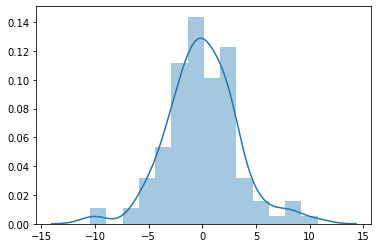

In [ ]:
# plot a distribution plot using distplot()
sns.distplot(MLR_model_full.resid)

# display the plot
plt.show()

The distribution plot shows a near normal distribution. So, we assume the normality.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                        <b>11. Does the interaction of status of the country and its GDP have significant effect on life expectancy? (consider the full model)</b>
                </font>
            </div>
        </td>
    </tr>
</table>

#### The model evaluation metrics for full model:

In [ ]:
# print the the R-squared and adjusted R-squared for the model
print("The full model without interaction effect:\n")

# print the r-squared value
print("The r-squared for the full model without interaction effect is:",MLR_model_full.rsquared)

# print the adjusted r-squared value
print("The adjusted r-squared for the full model without interaction effect is:",MLR_model_full.rsquared_adj)

The full model without interaction effect:

The r-squared for the full model without interaction effect is: 0.8484171838775856
The adjusted r-squared for the full model without interaction effect is: 0.8257505945508694


#### The model with interaction effect:

In [ ]:
# consider the interaction effect
X["interaction"] = X["Status_Developing"]*X["GDP"]

# set the dependent variable
y = df_lifeExp['Expected']

# building a model with an intercept
# fit() is used to fit the OLS model
MLR_model_interaction = sm.OLS(y,X).fit()

# print the model summary 
print(MLR_model_interaction.summary())

                            OLS Regression Results                            
Dep. Variable:               Expected   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     36.30
Date:                Wed, 08 Apr 2020   Prob (F-statistic):           2.14e-36
Time:                        23:00:52   Log-Likelihood:                -321.30
No. Observations:                 124   AIC:                             678.6
Df Residuals:                     106   BIC:                             729.4
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 62.5466      3

We see the interaction effect is not significant. However, on comparing the two models (with and without interaction efect), we see that the model with interaction effect has an increased R-squared of 0.853 and an increase adjusted R-squared of 0.830 compared to the model without interaction effect which has an R-squared of 0.848 and an adjusted R-squared of 0.826

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>12. Construct a full no-intecept model. What would you conclude when all the variables take value 0? </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
# we include all the numeric predictors
X = df_lifeExp.iloc[:,1:16]

# use 'drop_first' to create (n-1) dummy variables using get_dummies()
# use 'prefix' to add prefix to category of dummy variable
encoded_status = pd.get_dummies(data = df_lifeExp['Status'], drop_first=True, prefix = 'Status')

# concat the dummy variable with features describing immunization 
# create a dataframe of all relevant independent variables
# 'axis=1' concates the dataframes along columns 
X = pd.concat([pd.DataFrame(X), encoded_status], axis=1)

# set the dependent variable
y = df_lifeExp['Expected']

# building a model with an intercept
# fit() is used to fit the OLS model
MLR_model_full_no_intercept = sm.OLS(y,X).fit()

# print the model sumary
print(MLR_model_full_no_intercept.summary())

                                 OLS Regression Results                                
Dep. Variable:               Expected   R-squared (uncentered):                   0.993
Model:                            OLS   Adj. R-squared (uncentered):              0.992
Method:                 Least Squares   F-statistic:                              940.0
Date:                Wed, 08 Apr 2020   Prob (F-statistic):                   4.84e-108
Time:                        23:00:52   Log-Likelihood:                         -399.28
No. Observations:                 124   AIC:                                      830.6
Df Residuals:                     108   BIC:                                      875.7
Df Model:                          16                                                  
Covariance Type:            nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

If we don't add a constant intercept i.e. the column containing all ones, then the OLS method assumes a column with all zeroes i.e. no intercept. As seen from the above model with no intercept, we got very high values of R-Squared (0.993) and adj. R-Squared (0.992). 

Also, the equation of linear regression that we get will have no intercept(constant term). This means that our regression line will pass through the origin. This means that if the value of all the variables is zero, the life expectancy is 0 and that is not possible. There should be some value of life expectancy.

Lets check what will be the impact on the residuals for this no intercept model. 

In [ ]:
# calculating the sum of the residuals
round(MLR_model_full_no_intercept.resid.sum(), 4)

53.449

The sum of all the residuals must be zero or atleast close to zero for an intercept model. But as we can see from the above calculated sum of residuals, the sum is 53.449. Thus, this model will not perform better.

### Hereon on we shall consider the FEV dataset.


### About the data set (Respiratory function data)

Dataset consists of information about respiratory function in children and adolescents and factors that might impact the respiratory function. <br> Attribute information: 

**Age:** Age in years

**Height:** Height in inches 

**Gender:** Gender value is 1 if male 0 if female

**Smoke:** Whether the person is a smoker or non- smoker, the value is 1 if smoker and 0 otherwise

**FEV:**  Forced Exhalation Volume (FEV), a measure of how much air somebody can forcibly exhale from their lung (Percentage)

#### Load the dataset and check the first five observations

In [ ]:
# load the csv file
df_FEV = pd.read_csv('LungCapdata.csv')

# display the first two observations
df_FEV.head(2)

,Age,Height,Gender,Smoke,FEV
0,9,57.000000,0,0,1.708000
1,8,67.500000,0,0,1.724000


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>13. Can we use a linear regression model to analyze the impact of all the features on respiratory function (FEV) ? </b>
                </font>
            </div>
        </td>
    </tr>
</table>

To determine whether linear regression analysis can be performed on given data we check the following assumptions:
<br>1. Whether the target variable is numeric ?
<br>2. Is multicollinearity present in the data ?

In [ ]:
# check the datatype of the variable
print("Data type of target variable:",df_FEV.FEV.dtype)

Data type of target variable: float64


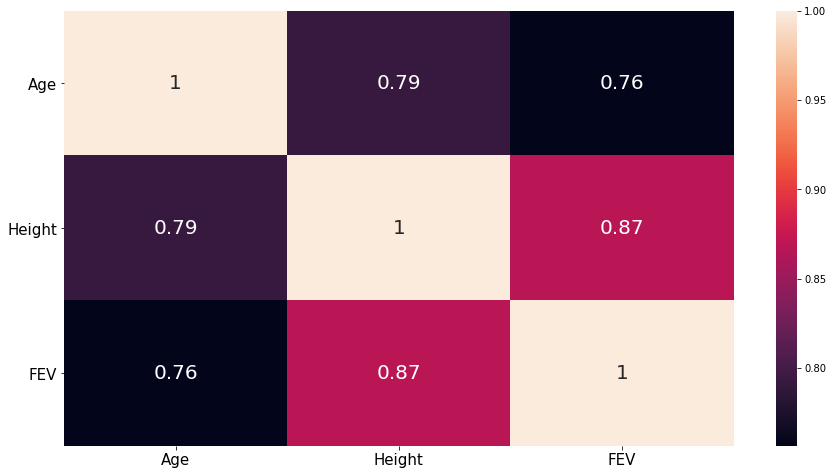

In [ ]:
# set dimensions for the plot figure
fig_dims = (15,8)
fig, ax = plt.subplots(figsize=fig_dims)

# create a copy of dataframe
df_FEV_num = df_FEV[["Age","Height", "FEV"]]

# plot the heat map
# corr: give the correlation matrix
# annot: prints the correlation values in the chart
# annot_kws: sets the font size of the annotation
sns.heatmap(df_FEV_num.corr(), annot = True, annot_kws = {"size": 20})

# rotate the y-axis labels
# set text size using 'fontsize'
plt.yticks(rotation = 'horizontal', fontsize = 15)
plt.xticks(fontsize = 15)

# display the plot
plt.show()

<br>From the above output we can see that the target variable is numeric. From the correlation plot, we can see that the predictor variables 'Age' and 'Height' have a high positive correlation value (0.79). Also, the variables 'Height' and 'FEV' have a high positive correlation value (0.87). Hence before applying the regression model we need to alter the data to rectify this problem.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>14. How can we rectify the multicollinearity detected in question 13? </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
# consider the independent variables
X = df_FEV.iloc[:,:-1] 

# create an empty dataframe
vif = pd.DataFrame()

# calculate VIF using list comprehension 
vif["VIF_Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# create a column of variable names
vif["Features"] = X.columns

# print the VIF
print(vif)

   VIF_Factor Features
0   24.322098      Age
1   24.524524   Height
2    2.130851   Gender
3    1.342164    Smoke


In the presence of multicollinearity, we drop the variable that has the highest VIF value before building the model. Here, we can see that the VIF value for 'Height' is slightly greater than VIF value for 'Age'. Hence we drop the 'Height' variable in this case.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>15. A Linear regression model is used to analyze the impact of all possible features on respiratory function (FEV). How do we check whether or not the model adequately captures the relationship between the response and predictor variables?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

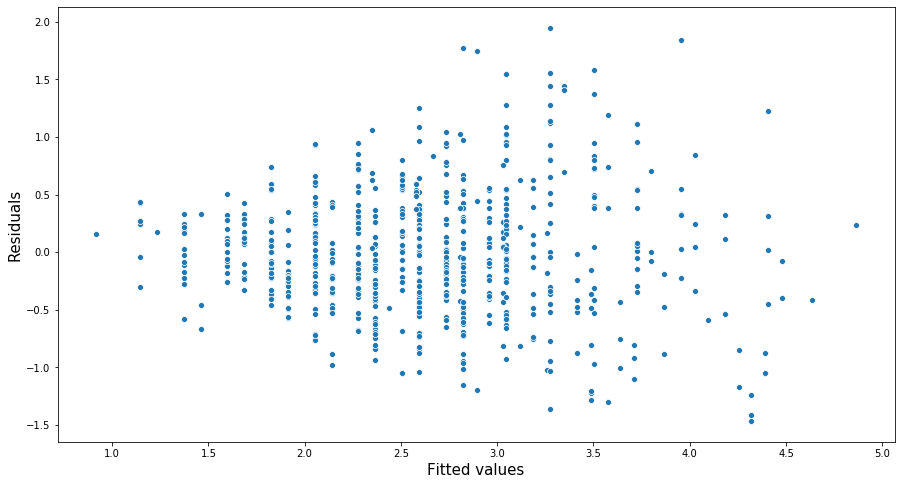

In [ ]:
# we include all the predictors
# drop(): drops specified column(s)/row(s) from the dataframe
# axis: specifies whether to drop labels from index or columns; use 1 for columns and 0 for index
X = df_FEV.drop(["Height", "FEV"], axis =1)

# 'sm.add_constant' adds the intercept to the model
X_intercept = sm.add_constant(X)

# set the dependent variable
y = df_FEV['FEV']

# building a model with an intercept
# fit() is used to fit the OLS model
MLR_model = sm.OLS(y,X_intercept).fit()

# obtain the residuals
residuals = MLR_model.resid

# obtain the fitted values
fitted_values = MLR_model.fittedvalues

# set the plot size
plt.figure(figsize = (15,8))

# plot a scatter plot
sns.scatterplot(fitted_values, residuals)

# set the x-axis label using xlabel()
# fontsize: specifies the fontsize
plt.xlabel("Fitted values", fontsize = 15)

# set the y-axis label using xlabel()
# fontsize: specifies the fontsize
plt.ylabel("Residuals",fontsize = 15)

# display the plot
plt.show()

The plot of residuals against the fitted tells the presence of linear relationship. For linear relationship, the points must be at random, i.e., it should not exhibit much distinctive pattern, no non-linear trends or changes in variability. 

Thus we may say that the linear relation exists.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>16.  A Linear regression model is used to analyze the impact of all possible features on respiratory function (FEV). Check whether the error terms are serially independent?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

To check the assumption of autocorrelation we shall conduct the Durbin-Watson test.
The hypothesis for the test are:

<p style='text-indent:20em'> <strong> H<sub>o</sub>: The error terms are not autocorrelated </strong> </p>
<p style='text-indent:20em'> <strong> H<sub>1</sub>: TThe error terms are autocorrelated  </strong> </p>

In [ ]:
# we include all the predictors
# drop(): drops specified column(s)/row(s) from the dataframe
# axis: specifies whether to drop labels from index or columns; use 1 for columns and 0 for index
X = df_FEV.drop(["Height", "FEV"], axis =1)

# 'sm.add_constant' adds the intercept to the model
X = sm.add_constant(X)

# set the dependent variable
y = df_FEV['FEV']

# building a model with an intercept
# fit() is used to fit the OLS model
MLR_model = sm.OLS(y,X).fit()

# create vector of result parmeters 
name = ['f-value','p-value'] 

# compute residuals using 'resid'
residuals = MLR_model.resid

# perform Durbin-Watson test 
durbin_watson(residuals)  

1.5969678178341284

From the test statistic, we conclude that there is a slight positive serial correlation. We shall ignore this value and there is assume no serial correlation as the value is close to 2. Futher, accept the model.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>17. A model is built using all the features to predict the FEV. Check whether the residuals obtained form the model are normally distributed. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

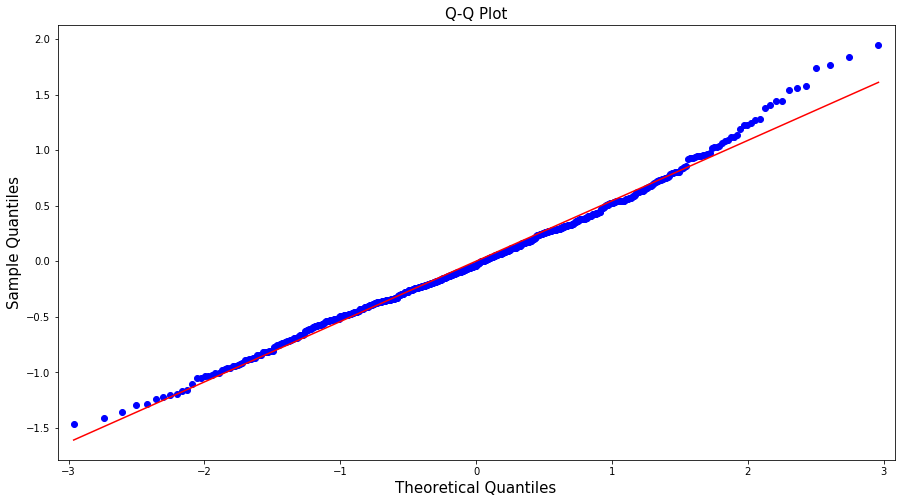

In [ ]:
# we include all the predictors
# drop(): drops specified column(s)/row(s) from the dataframe
# axis: specifies whether to drop labels from index or columns; use 1 for columns and 0 for index
X = df_FEV.drop(["Height", "FEV"], axis =1)

# 'sm.add_constant' adds the intercept to the model
X = sm.add_constant(X)

# set the dependent variable
y = df_FEV['FEV']

# building a model with an intercept
# fit() is used to fit the OLS model
MLR_model = sm.OLS(y,X).fit()

# set the plot size
plt.rcParams['figure.figsize'] = (15,8)

# plot the Q-Q plot
# 'r' represents the regression line
qqplot(MLR_model.resid, line = 'r')

# set plot and axes labels
# set text size using 'fontsize'
plt.title('Q-Q Plot', fontsize = 15)
plt.xlabel('Theoretical Quantiles', fontsize = 15)
plt.ylabel('Sample Quantiles', fontsize = 15)

# display the plot
plt.show()

The diagonal line (red line) is the regression line and the blue points are the cumulative distribution of the residuals. As, the points are close to the diagonal line, we conclude that the residuals follow a near normal distribution.

<a id="ml_perf"> </a>
## 6. Model Performance

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>18. Consider the full model. Calculate the mean square error and the root mean square error.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
# we include all the predictors
# drop(): drops specified column(s)/row(s) from the dataframe
# axis: specifies whether to drop labels from index or columns; use 1 for columns and 0 for index
X = df_FEV.drop(["Height", "FEV"], axis =1)

# to estimate the regression coefficient , a constant term of '1' needs to be added as a separate column
# 'sm.add_constant' adds the intercept to the model
X = sm.add_constant(X)

# set the dependent variable
y = df_FEV['FEV']

# building a model with an intercept
# fit() is used to fit the OLS model
MLR_model = sm.OLS(y,X).fit()

# Calculating the mse using the "mean_squared_error" function

# calculating the MSE for the test data and then rounding the value upto 4 digits
mse_train = round(mean_squared_error(y, MLR_model.fittedvalues),4)

# printing the mse for the training set
print("Mean Squared Error (MSE): ", mse_train)

# Calculating the rmse using the "root_mean_squared_error" function

# MSE for the train data
mse_train = mean_squared_error(y, MLR_model.fittedvalues)

# taking the square root of the mse and then rounding the value upto 4 digits
rmse_train = round(np.sqrt(mse_train), 4)

# printing the rmse for the train set
print("Root Mean Squared Error (RMSE): ", rmse_train)

Mean Squared Error (MSE):  0.2932
Root Mean Squared Error (RMSE):  0.5415


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>19. Calculate the mean absolute error and the  mean absolute percentage error. Compare the values of RMSE and MAE. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
# a user defined function to calculate MAPE 
# the function take arguments: actual and predicted values
# it returns the MAPE 
def mape(actual, predicted):
    return (np.mean(np.abs((actual - predicted) / actual)) * 100)

In [ ]:
# Calculating the MAE using the "mean_absolute_error" function

# calculating the MAE for the train data and then rounding the value upto 4 digits
mae_train = round(mean_absolute_error(y, MLR_model.fittedvalues),4)

# printing the MAE for the training set
print("Mean Absolute Error (MAE) on training set: ", mae_train)

# Calculating the MAPE using the "mape()" function created above

# calculating the MAPE for the train data and then rounding the value upto 4 digits
mape_train = round(mape(y, MLR_model.fittedvalues),4)

# printing the mape for the training set
print("Mean Absolute Percentage Error (MAPE) on training set: ", mape_train)

Mean Absolute Error (MAE) on training set:  0.423
Mean Absolute Percentage Error (MAPE) on training set:  16.9434


As you can see, the value of RMSE is greater than the value of MAE. The reason for this is that the RMSE punishes the model for large error terms. Thus, RMSE is a robust method that is generally used.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>20. Consider the full model, has the model overfitted? </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
# we include all the numeric predictors
X=df_FEV.iloc[:,:4].values

# to estimate the regression coefficient , a constant term of '1' needs to be added as a separate column
# 'sm.add_constant' adds the intercept to the model
X=sm.add_constant(X)

# set the dependent variable
y=df_FEV['FEV']

# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code
# 'test_size' returns the proportion of data to be included in the testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size = 0.3)

# building a model with an intercept
# fit() is used to fit the OLS model
MLR_model = sm.OLS(y_train,X_train).fit()

print(MLR_model.summary())

# For training set:
# train_pred: Prediction made by the model on the training dataset 'X_train'
# y_train: Actual values of the target variable for the train dataset

# For testing set:
# test_pred: Prediction made by the model on the test dataset 'y_train'
# y_test: Actual values of the target variable for the test dataset

# Predicting the output of the target variable from the train data
# train_pred can also be obtained from "MLR_model_with_significant_var.fittedvalues"
train_pred = MLR_model.predict(X_train)

# Predicting the output of the target variable from the test data
test_pred = MLR_model.predict(X_test)

# Calculating the mse using the "mean_squared_error" function

# MSE for the train data
mse_train = mean_squared_error(y_train, train_pred)
# taking the square root of the mse and then rounding the value upto 4 digits
rmse_train = round(np.sqrt(mse_train), 4)
# printing the rmse for the train set
print("Root Mean Squared Error (RMSE) on training set: ", rmse_train)

# MSE for the test data
mse_test = mean_squared_error(y_test, test_pred)
# taking the square root of the mse and then rounding the value upto 4 digits
rmse_test = round(np.sqrt(mse_test), 4)
# printing the rmse for the test set
print("Root Mean Squared Error (RMSE) on test set: ", rmse_test)



                            OLS Regression Results                            
Dep. Variable:                    FEV   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     406.0
Date:                Wed, 08 Apr 2020   Prob (F-statistic):          4.14e-148
Time:                        23:00:53   Log-Likelihood:                -244.78
No. Observations:                 457   AIC:                             499.6
Df Residuals:                     452   BIC:                             520.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.4826      0.263    -17.072      0.0

It can be seen from the RMSE values of train and the test set that there is very less difference in the values. Thus, it can be said that the model is not overfitted. If a significant difference is seen in the RMSE of the train and the test set, then it can be said that the model is overfitted on the train set.